In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [41]:
df=pd.read_csv("emails.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Text(0.5, 1.0, 'Pie chart')

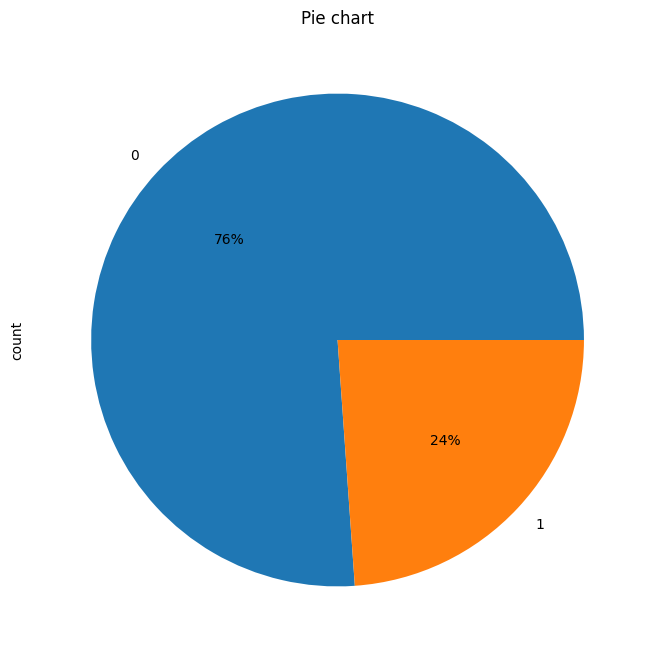

In [42]:
plt.figure(figsize = (8, 8))
df['spam'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')

In [43]:
x = df['text'].values
y = df['spam'].values

In [44]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

In [45]:
cv = CountVectorizer() 
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [46]:
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [34]:
model.score(x_test,y_test)

0.9572425828970331

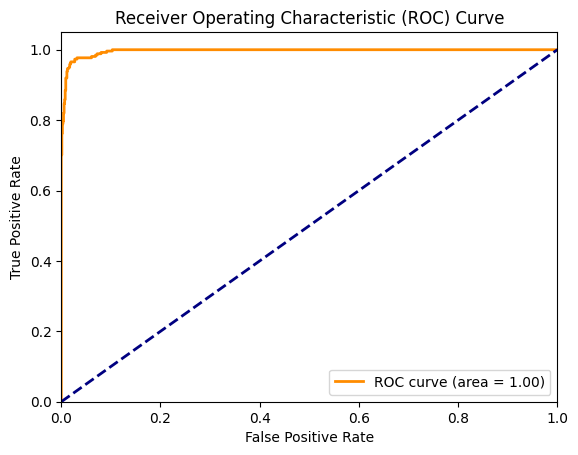

In [53]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
